**Kaggle team name**: 🐧6-AEIOU-Acosta,Bollineni
1. Format: `🐧[BB Team#]-[Your fancy Kaggle group name]-[Students' names]`.
  1. Eg. `🐧A-Heros-Fleischer,Melnikov`, where 🐧 identifies JHU and `A` identifies the Canvas group code

Your private LB score must be reproducible with this Colab. Seed all [RNG](https://en.wikipedia.org/wiki/Random_number_generation). Don't exceed runtime quota.

<small><hr style="margin:0;background-color:silver"><font color=gray>Notebook author: <a href="https://www.linkedin.com/in/olegmelnikov/" target="_blank">Oleg Melnikov</a>, ©<a href="https://apps.ep.jhu.edu/course-homepages/3765-605-742-deep-neural-networks" target="_blank">JHU</a> 2021 onwards</font></small>

<hr color=darkblue>

# **🏆👂Phonemes**

<details><summary><font color=darkblue>More info and Kaggle API instructions</font></summary>

[Kaggle competition URL](https://www.kaggle.com/c/2722phonemes/rules). See competition rules, submission, grading, dataset, and performance metric. The **starter code** below produces a baseline model, which you should beat, while respecting the competition rules. Your code starts after the timer. This is your baseline model. Seed all [RNG](https://en.wikipedia.org/wiki/Random_number_generation) for reproducibility!

**Instructions for enabling Kaggle API in Colab**:
1. Accept competition rules before running [Kaggle API](https://github.com/Kaggle/kaggle-api#api-credentials). [Loading Kaggle dataset example](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab)
1. In your Kaggle Account, [Create API Token](https://github.com/Kaggle/kaggle-api#api-credentials) and save the resulting **kaggle.json** file to the [root of your Google Drive](https://drive.google.com/drive/u/0/my-drive)
2. In Colab, open **Files** panel 🗀 (on the left) and click gray folder icon <font color=gray>🖿</font> to mount your Google drive

Your Kaggle/Google Drive credentials are secure; and Colab's kaggle.json only lasts a Colab session.

</details>


In [ ]:
from google.colab import drive; drive.mount('/content/drive')   # OK to enable, if kaggle.json is stored in Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip -q install --upgrade --force-reinstall --no-deps kaggle > log  # upgrade kaggle package (to avoid a warning)
!mkdir -p ~/.kaggle                                           # .kaggle folder must contain kaggle.json for kaggle executable to properly authenticate you to Kaggle.com
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json >log  # First, download kaggle.json from kaggle.com (in Account page) and place it in the root of mounted Google Drive
!cp kaggle.json ~/.kaggle/kaggle.json > log                   # Alternative location of kaggle.json (without a connection to Google Drive)
!chmod 600 ~/.kaggle/kaggle.json                              # give only the owner full read/write access to kaggle.json
!kaggle config set -n competition -v 2722phonemes             # set the competition context for the next few kaggle API calls. !kaggle config view - shows current settings
!kaggle competitions download >> log                          # download competition dataset as a zip file
!unzip -o *.zip >> log                                        # Kaggle dataset is copied as a single file and needs to be unzipped.
!kaggle competitions leaderboard --show                       # print public leaderboard

cp: cannot stat 'kaggle.json': No such file or directory
- competition is now set to: 2722phonemes
Using competition: 2722phonemes
 teamId  teamName                                                              submissionDate       score    
-------  --------------------------------------------------------------------  -------------------  -------  
8157293  JA-Soundclout-Barrett-Rumman                                          2022-02-20 18:12:42  0.93840  
8797372  Samuel Nathanson                                                      2022-06-26 22:25:54  0.93500  
8152495  JC-Phonemes-Lee,Givre                                                 2022-02-20 18:57:04  0.93140  
8818838  Naveen Sahi                                                           2022-06-27 00:57:37  0.93100  
8178607  IB-Pears-Ivanushkina, Miniakhmetov, Odnakov                           2022-02-20 17:07:43  0.93060  
8815539  🐧1-Classyfiers- Rice, Samman, Rivas                                   2022-06-26 09:21:01 

In [ ]:
%%time
%%capture
%reset -f
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all"
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt, seaborn as sns, os, tqdm, re, sys, cv2, skimage
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA, LinearDiscriminantAnalysis as LDA
ToCSV = lambda df, fname: df.round(2).to_csv(f'{fname}.csv', index_label='id') # rounds values to 2 decimals

class Timer():
  def __init__(self, lim:'RunTimeLimit'=60): self.t0, self.lim, _ = time.time(), lim, print(f'⏳ started. You have {lim} sec. Good luck!')
  def ShowTime(self):
    msg = f'Runtime is {time.time()-self.t0:.0f} sec'
    print(f'\033[91m\033[1m' + msg + f' > {self.lim} sec limit!!!\033[0m' if (time.time()-self.t0-1) > self.lim else msg)

np.set_printoptions(linewidth=100, precision=2, edgeitems=2, suppress=True)
pd.set_option('max_columns', 20, 'precision', 2, 'display.max_rows', 4)

CPU times: user 158 ms, sys: 7 ms, total: 165 ms
Wall time: 167 ms


In [ ]:
df = pd.read_csv('XY_Phonemes.csv', low_memory=False); df

x1     x2     x3     x4     x5     x6     x7     x8     x9    x10  \
0      11.14  15.17  19.12  18.78  13.79  18.98  20.09  19.16  17.32  19.76   
1      10.84  15.20  19.80  17.82  14.10  17.93  19.54  20.97  16.65  22.41   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
59998  12.15  15.78  21.27  19.61  15.14  21.44  23.24  20.91  17.42  21.22   
59999  14.78  14.08  15.70  15.51  15.36  15.52  14.68  15.57  15.48  15.45   

       ...   x249   x250   x251   x252   x253   x254   x255   x256  SpkrID  \
0      ...   7.79  10.95  10.05   8.67  10.84   9.50   7.96   9.04       0   
1      ...  12.95  13.05  11.95  11.07  10.81   9.71  11.57  12.22       0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
59998  ...   8.82   8.00   7.44   8.32   6.51   8.33   6.83   7.02     436   
59999  ...  12.87  13.26  13.16  12.65  13.90  13.10  11.16  13.53     436   

         g  
0      NaN  
1      NaN  
...    ...  
59998   ao  
59999   sh  

[60000 rows x 258 columns]

In [ ]:
df.info()   # observe datatypes and any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 258 entries, x1 to g
dtypes: float64(256), int64(1), object(1)
memory usage: 118.1+ MB


In [ ]:
# Change string labels to numbers in order of increasing size of the entity (Star < Quasi Star < Galaxy)
# df.Class = df.Class.apply(lambda C: -1 if C=='S' else 0 if C=='Q' else 1 if C=='G' else None)

In [ ]:
vX = df.query('g!=g').drop('g', axis=1)  # slice a test sample
tXY = df.query('g==g')                   # slice training sample
tX, tY = tXY.drop('g', axis=1), tXY.g    # split into training I/O

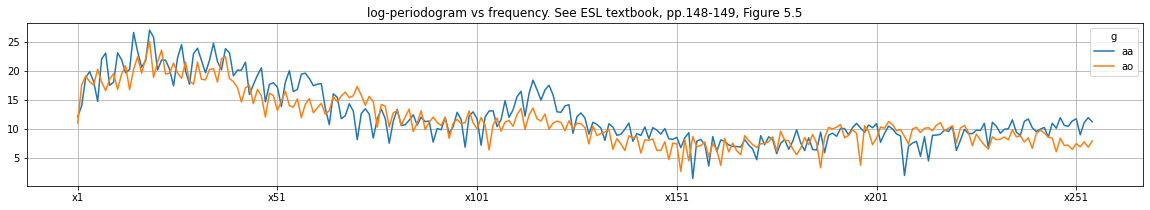

In [ ]:
aa = tXY[tXY.g=='aa'].set_index('g').iloc[[0],0:255]
ao = tXY[tXY.g=='ao'].set_index('g').iloc[[0],0:255]
_ = pd.concat([aa,ao]).T.plot(figsize=(20,3), grid=True, title='log-periodogram vs frequency. See ESL textbook, pp.148-149, Figure 5.5');

In [ ]:
tmr = Timer()

⏳ started. You have 60 sec. Good luck!


<hr color=red>

<font size=5>⏳</font> <strong><font color=orange size=5>Your Code, Documentation, Ideas and Timer - All Start Here...</font></strong>

**Student's Section** (between ⏳ symbols): add your code and documentation here.

## **Task 1. Preprocessing Pipeline**

Explain elements of your preprocessing pipeline i.e. feature engineering, subsampling, clustering, dimensionality reduction, etc.
1. Why did you choose these elements? (Something in EDA, prior experience,...? Btw, EDA is not required)
1. How do you evaluate the effectiveness of these elements?
1. What else have you tried that worked or didn't?

**Student's answer:**
1. The preprocessing pipeline consisted mainly of subsampling the training dataset. One of the main challenges of this competition was minimizing the training size such that the training time was well within the 60s limit. Thus the approach taken in order to obtain a representative sample of the population was to simply use one observation for each speaker for each phoneme. This brought the total number of observations down to 1662 samples.
2. The effectiveness of each element was assessed via stratified cross validation, where the measure we used primarily is accuracy.  Multiple combinations of preprocessing steps were tried and the best score on the hold out data was kept for submission to the competetition.
3. One element that I tried was smoothing our log-periodogram by averaging response across blocks of frequencies. Various blocks were tried (averaging across 2,4,8 frequencies) which had the added benefit of decreasing the number of features our model was trainined on. In addition, we tried an usupervised outlier removal approach using local outlier factor to the sampled data in order to remove possible outliers. Nonetheless none of these preprocessing steps contributed to increasing the cross validated scores and as such were left out of the final model.
The main aspect of the preprocessing pipeline that did improve our baseline scores was selecting a sample of each sound from each speaker from the dataset. By just including this subsampling strategy we were able to obtain our highest score on the public leaderboard.
We also tried incorporating the spkrID feature using a one-hot encoder but this dramatically increased our number of features, further increasing runtime at evaluation and as such we opted to leave it out of the predictive features.

  We attempted to use RandomForest to identify which features were most important to training the model and dropped those features. Although this technique improved the accuracy of the model, the time it took to run exceeded the requirement of less than 60 seconds. We performed PCA to reduce the dimensionality of the dataset which helped speed up the model however the accuracy did not improve. Additionally, we attempted to DBSCAN to remove outliers. This technique not only took some time to run but it was also difficult to determine the correct hyperparameters. Domain knowledge of the data set would be helpful in correctly identifying these hyperparameters of DBSCAN which we did not possess despite extensive research of online sources.

## **Task 2. Modeling Approach**
Explain your modeling approach, i.e. ideas you tried and why you thought they would be helpful.

1. How did these decisions guide you in modeling?
1. How do you evaluate the effectiveness of these elements?
1. What else have you tried that worked or didn't?

**Student's answer:**
1. Given the strenghts of ensemble learning, we undertook two approaches: Random Forest and Gradient Boosting classifiers using SKlearn. These unsurprisingly showed greater results than just using a single decision tree classifier and as such we focused on developing these algorithms by hyperparameter tuning. The RandomForest can be run in parallel, so it is quicker, and we have the ability to use a GPU accelerator to improve the time issue. GradientBoosting model runs sequentially but is an additive technique that optimizes the loss by each boosting iteration. Both models performed well, but we found that RandomForest overfit more than GradientBoosting.
Striking a balance between performance and speed was the key in identifying the correct model.
  

2. Direct comparison between the hypertuned ensemble models using Gridsearch cross validation was how we judged the effectiveness of both the random forest and gradient boost classifiers. In addition to cross-validation, given that our preprocessing approach was to use a single instance of each sound for each speaker, we also created a representative hold out dataset (in the same manner we selected our training data) that we used to explore how our trained models would generalize beyond the training data.
3. In the end our exploration of the different models and various combinations of hyperparameters had to succumb to our 60 s runtime restriction. Thus our optimal approaches had to be modified so as to keep the runtime in check. While our ideal scenarios contained more than 1 sound per speaker in the training dataset, we had to limit the training size. In addition, we had to subsample when running the gradient boost, yielding stochastic gradient boosting where we used a subsample of 0.75, which improved our model. We did use GradientBoosting regularization of shrinkage where we chose a learning rate less than 1. We found that using 0.05 performed the best through GridSearchCV. We did different loss functions but the default of log_loss performed the best.
 We tried regularizing our ensembles by limiting the minimum number of samples at the leaf nodes, exploring different max depths, subsamples, number of estimators but in the end we simply had to choose the combination that kept runtime under 60s.

#Runtime Code

Below we define our preprocessing functions. The function *smooth_freq* takes as input the raw training data and averaged a user specified (freq_band) number of consecutive frequencies to average. The *select_spkr_obs* function aided in choosing the number of instances for each sound per speaker to include in the training/testing dataset. Lastly the *preprocessing* function serves as a wrapper for these two previous functions as well as removing the 'SpkrID' feature from the data.

##Define preprocessing functions

In [ ]:
def smooth_freq(df_,freq_band=2,train=True):
  if freq_band==1:
    return df_
  else:
    df=df_.copy()
    #df_new=pd.DataFrame()
    all=[]
    for upper in [x for x in range(freq_band,256+freq_band,freq_band)]:
      df_sub=df.iloc[:,upper-freq_band:upper]
      avg=df_sub.mean(axis=1)
      #df_new[f"{upper-freq_band}-{upper}"]=avg
      all.append(avg)
    df_new=pd.concat(all,axis=1)
    if train:
      df_new['SpkrID']=df['SpkrID']
      df_new['g']=df['g']
    return df_new


def select_spkr_obs(df,num_spkr_obs=1,generate_test=False,num_spkr_test=1):
  df_sampled=pd.DataFrame()
  df_test=pd.DataFrame()
  for speaker,data in df.groupby("SpkrID"):
    for pho,data2 in data.groupby("g"):
      df_sampled=df_sampled.append(data2.iloc[:num_spkr_obs,:])
      if generate_test:
        df_test=df_test.append(data2.iloc[num_spkr_obs:num_spkr_obs+num_spkr_test,:])
  if generate_test:
    return df_sampled,df_test
  else:
    return df_sampled


def preprocessing(df,freq_band=2,train=True,num_spkr_obs=1,generate_test=False,num_spkr_test=1,drop_spkr=True):
  if not train:
    return smooth_freq(df,freq_band=freq_band,train=False)
  else:
    df_smoothed=smooth_freq(df,freq_band,train)
    if generate_test:
      df_train,df_test=select_spkr_obs(df_smoothed,num_spkr_obs,generate_test,num_spkr_test)
      if drop_spkr:
        df_X_train=df_train.drop(['SpkrID','g'],axis=1)
        df_X_test=df_test.drop(['SpkrID','g'],axis=1)
      else:
        df_X_train=df_train.drop(['g'],axis=1)
        df_X_test=df_test.drop(['g'],axis=1)
      df_Y_train=df_train['g']
      df_Y_test=df_test['g']

      return (df_X_train,df_Y_train),(df_X_test,df_Y_test)
    else:
      df_train=select_spkr_obs(df_smoothed,num_spkr_obs)
      if drop_spkr:
        df_X_train=df_train.drop(['SpkrID','g'],axis=1)
      else:
        df_X_train=df_train.drop(['g'],axis=1)
      df_Y_train=df_train['g']
      return df_X_train,df_Y_train


##Final Model for Submission
**Note**: Due to runtime being very close to 60s (avg. about 56 seconds) we have opted to remove all other code used to arrive at this model, such as various plots,cross-validations,etc.

In [ ]:
%%time
randomState=123
tX_sampled,tY_sampled=preprocessing(tXY,freq_band=1)
#vX_p=preprocessing(vX,freq_band=1,train=False)
vX_p=vX.drop('SpkrID',axis=1) #Used this instead of preprocessing since we ultimately decided to use all frequencies and not average
m = GradientBoostingClassifier(verbose=0,subsample=.75, n_estimators=100,learning_rate=.05,random_state=randomState,max_features='auto')
m.fit(tX_sampled,tY_sampled)
pY = pd.DataFrame(m.predict(vX_p), index=range(1,len(vX_p)+1), columns=['g'])  # ensure that labels and observations are in corresponding order
ToCSV(pY, 'MySubmission_Final')

CPU times: user 51.4 s, sys: 147 ms, total: 51.6 s
Wall time: 56.2 s


# **References:**

1. Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems - Geron Aurelien
2. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
4. https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regularization.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regularization-py
5. https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
6. https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html
7. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
8. https://medium.com/@dilip.voleti/dbscan-algorithm-for-fraud-detection-outlier-detection-in-a-data-set-60a10ad06ea
9. The Elements of Statistical Learning – Hastie et al.


<font size=5>⌛</font> <strong><font color=orange size=5>Do not exceed competition's runtime limit!</font></strong>

<hr color=red>


In [ ]:
tmr.ShowTime()    # measure Colab's runtime. Do not remove. Keep as the last cell in your notebook.

Runtime is 56 sec


## 💡**Starter Ideas**

1. Tune model hyperparameters
1. Try smarter sampling from the training set to avoid using all observations (due to time constraint) and, instead, develop more features
1. Try feature restriction, selection, and regularization (see ESL pp.140-141)
1. Do a thorough EDA: look for feature augmentations that result in linear decision boundaries between pairs of classes.
1. Try encoding and incorporating speaker ID
1. Carefully read the example in [ESL textbook, p.149](https://hastie.su.domains/ElemStatLearn/printings/ESLII_print12.pdf#page=168), check seminar Colab and lecture slides
1. Learn the domain to develop better features. See ["Penalized discriminant analysis"](https://scholar.google.com/scholar?hl=en&as_sdt=0%2C48&q=Penalized+Discriminant+Analysis&btnG=)
1. Look for training outliers that can affect your model's test performance.
  1. Essentially, you need to find and exclude training [influential points](https://en.wikipedia.org/wiki/Influential_observation), but training outliers might be influential
  1. Brute force with [LOOCV](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#Leave-one-out_cross-validation) is slow, but robust. You might find methods to find each training point's contribution to the prediction and remove rare extreme contributors (since they may not be in the test set)
  1. You can find outliers; then evaluate their effect on model's performance
    1. You can evaluate 1D and 2D histograms to find outliers and
    1. You can cluster observations and find outliers that don't fit the clusters (DBSCAN may be helpful)
    1. You can compress high dimensional space to 1D (with PCA, tSNE, UMAP) and then find outliers with a histogram


